<p align="center"> <img style=" margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="350" height="150" /> 
    
    
## <H1 align="center"> <font color='white'> Quantitative Finance </H1>

### <H3 align="center"> <font color='white'> Homework 3: *Corporate Finance: Stochastic X Factor* </H1>

 <H5 align="center"> <em> Professor: Zárate Carbajal José Mario </H1><em>

 <strong> <H5 align="right"> Student: Márquez Delgado Esteban <strong>

 *Registry*: if700637

 Date: September 6, 2022

  <center> <font color= #555555> <font size = 4> September 2022 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/EstebanMqz/Quantitative-Finance'>Link</a></font>

In [3]:
#Libraries
import pandas as pd
import numpy as np
from yahoofinancials import YahooFinancials #Financial data download solution 1
import yfinance as yf #Financial data download solution 2
import pandas_datareader as pdr
import pandas_datareader.data as web #Data extraction from the web.
import datetime #Modules to work with date and time
from datetime import datetime, timedelta, date
from sklearn.neighbors import KernelDensity #ML library for KDEs
from sklearn import metrics #ML metrics library
from fitter import Fitter, get_common_distributions, get_distributions #PDF identification library
from re import I
import matplotlib.pyplot as plt #Visualization lib in matplot.
from matplotlib.pyplot import figure #Visualization presentation lib in matplot.
from turtle import width #Plot lines thickness lib.
import scipy.stats as st #Statistics lib
import statsmodels.api as sm
import scipy as sp
import scipy.optimize as optimize
import scipy.cluster.hierarchy as hac
import seaborn as sns #Seaborn visualization lib
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [22]:
stocks = ["AZO", "^GSPC"] #It can be a list
start = datetime(2021,9,6)
end = datetime(2022,9,6)
data = pdr.DataReader(stocks, 'yahoo',start,end)["Adj Close"]
sp500=data['^GSPC']
returns = data.pct_change().dropna()
Beta = sp500.corr(data.AZO)
Beta

-0.3571732395933875

Continuous Distributions

In [23]:
dist=([d for d in dir(st) if isinstance(getattr(st, d), getattr(st, "rv_continuous"))])
dist=dist[0:60] #104 continuous disttributions, sliced. The distributions not adequate for returns delay the execution.
pd.DataFrame(dist).head(10)

,0
0,alpha
1,anglit
2,arcsine
3,argus
4,beta
5,betaprime
6,bradford
7,burr
8,burr12
9,cauchy


In [40]:
ret_azo=returns['AZO']
ret_sp500=returns['^GSPC']
closes_azo=data['AZO']
closes_sp500=data['^GSPC']

{'johnsonsu': (11.543316976713662, 5.206661903044275, 2875.478662919315, 194.7242678892573)}


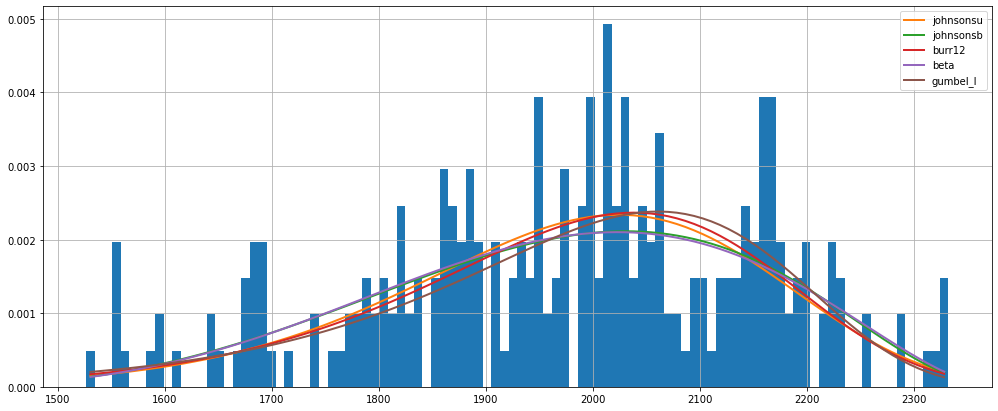

In [41]:
f=Fitter(closes_azo, distributions=dist)
f.fit()

f.summary() #plots (best 5 pdf), comment to only get params.
fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

{'johnsonsb': (-0.38392402782490515, 0.8020693297274375, 3618.650124639842, 1202.3055443435885)}


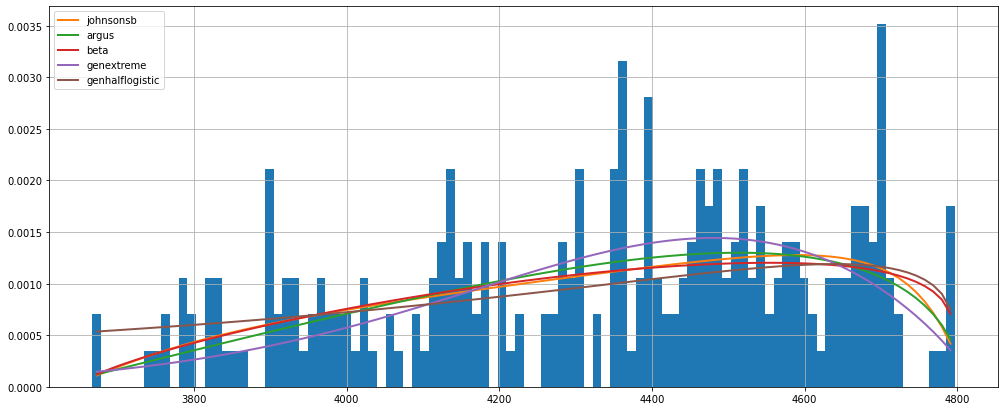

In [37]:
f=Fitter(closes_sp500, distributions=dist)
f.fit()

f.summary() #plots (best 5 pdf), comment to only get params.
fig = plt.gcf()
fig.set_size_inches(17, 7)

print(f.get_best())

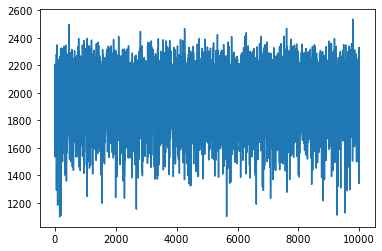

In [42]:
sim_azo = st.johnsonsu.rvs(11.543316976713662, 5.206661903044275, 2875.478662919315, 194.7242678892573, size=10000)
plt.plot(sim_azo)

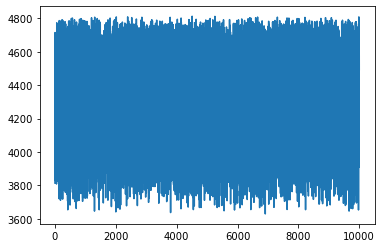

In [43]:
sim_sp500 = st.johnsonsb.rvs(-0.38392402782490515, 0.8020693297274375, 3618.650124639842, 1202.3055443435885,size=10000)
plt.plot(sim_sp500)

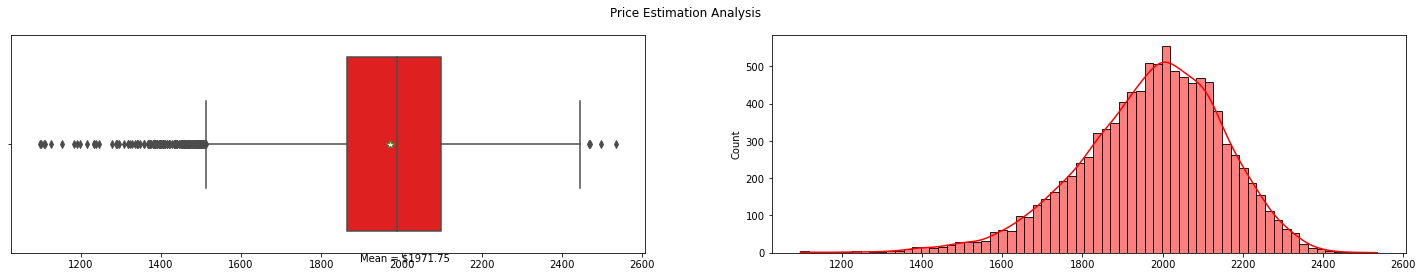

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def BoxHist(data, size, color, title):
    """

    BoxHist plots a boxplot and a histogram for a given cuantitative dataset.

    *data : dataset.
    *size : Size tupla (width, height).
    *color : Plots color.
    *title : Title.   
    """
    fig, axes = plt.subplots(1, 2, figsize = size)
    fig.suptitle(title)
    plt.text(.5,.5,str('Mean = $')+str(round(data.mean(),2)), horizontalalignment='left', verticalalignment='top')
    sns.boxplot(x = data, ax = axes[0], color = color, showmeans=True, meanprops={"marker":"*","markerfacecolor":"white","markersize":"8.5"})
    sns.histplot(x = data, ax = axes[1], kde = True, color = color)

BoxHist(sim_azo, (25,4), 'red', 'Price Estimation Analysis')